In [57]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import sys
sys.path.append("/scratch/cgarcia_2002/Complete_analysis")  # Añade la ruta al directorio que contiene tus funciones

import importlib
import functions_spills

importlib.reload(functions_spills)

from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['figure.figsize'] = [10, 8]
rcParams['font.size'] = 22

In [58]:
root_file_path = "/data/cgarcia_2002/WCTE/data/2384_calib_time/WCTE_offline_R2384S0P3.root" #bkg

# Open the ROOT file and get the TTree
file = uproot.open(root_file_path)
tree = file["WCTEReadoutWindows"]  

times_branch_sorted, times_branch_sorted_TOF, charge_branch_sorted, mpmt_id_branch_sorted, event_number_branch = functions_spills.initial_treatment(tree)
print(len(times_branch_sorted))

1908


In [59]:
root_file_path = "/data/cgarcia_2002/WCTE/data/2385_calib_time/WCTE_offline_R2385S0P3.root"  #signal

# Open the ROOT file and get the TTree
file = uproot.open(root_file_path)
tree_sig = file["WCTEReadoutWindows"]  

times_branch_sorted_sig, times_branch_sorted_TOF_sig, charge_branch_sorted_sig, mpmt_id_branch_sorted_sig, event_number_branch_sig = functions_spills.initial_treatment(tree_sig)
print(len(times_branch_sorted))

1908


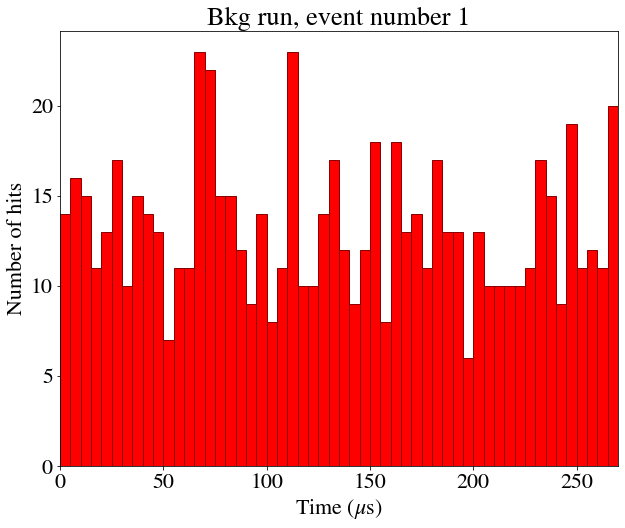

In [60]:
event_number = 1

plt.figure()
plt.hist(times_branch_sorted_TOF[event_number], range = [0, 270000], bins = 54,color='red', edgecolor='darkred')
plt.xlabel(r'Time ($\mu$s)')
plt.ylabel('Number of hits')
plt.title(f'Bkg run, event number {event_number}')
plt.xlim(0, 270000)  # Ajusta el límite del eje X
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}'))
plt.show()

In [61]:
times_branch_modified, threshold_times, deleted_index_dict = functions_spills.repeat_spills_nHits(event_number_branch, times_branch_sorted_TOF, 300, 5000, 6000)
times_branch_modified_sig, threshold_times_sig, deleted_index_dict_sig = functions_spills.repeat_spills_nHits(event_number_branch_sig, times_branch_sorted_TOF_sig, 300, 5000, 6000)


Filtering nHits event 0...
Filtering nHits event 1000...
Filtering nHits event 0...
Filtering nHits event 1000...
Filtering nHits event 2000...
Filtering nHits event 3000...
Filtering nHits event 4000...
Filtering nHits event 5000...
Filtering nHits event 6000...
Filtering nHits event 7000...
Filtering nHits event 8000...
Filtering nHits event 9000...
Filtering nHits event 10000...
Filtering nHits event 11000...
Filtering nHits event 12000...
Filtering nHits event 13000...
Filtering nHits event 14000...
Filtering nHits event 15000...
Filtering nHits event 16000...
Filtering nHits event 17000...
Filtering nHits event 18000...
Filtering nHits event 19000...
Filtering nHits event 20000...
Filtering nHits event 21000...
Filtering nHits event 22000...
Filtering nHits event 23000...
Filtering nHits event 24000...
Filtering nHits event 25000...
Filtering nHits event 26000...
Filtering nHits event 27000...
Filtering nHits event 28000...
Filtering nHits event 29000...


In [62]:
print(threshold_times)

total_elements = sum(len(v) for v in threshold_times.values())
print("Total number of elements in threshold_times for bkg:", total_elements, max(event_number_branch), total_elements/max(event_number_branch))

total_elements = sum(len(v) for v in threshold_times_sig.values())
print("Total number of elements in threshold_times for signal:", total_elements, max(event_number_branch_sig), total_elements/max(event_number_branch_sig))


{2: [92239.60479160454], 6: [106529.65729692296], 9: [118792.2575734815, 219832.30759064583], 11: [130443.47989171134, 204069.55990030736], 13: [92693.14016251989], 14: [65738.69154491316], 15: [22874.03500140377], 17: [238831.13743511756], 24: [100093.03289727222, 223471.76438544874, 246032.5256284909], 26: [113321.20340027302, 154564.11208986538], 33: [35845.14740679726, 58088.69992904545, 111838.62472350127], 37: [199625.53904179033], 38: [185967.91973575891], 39: [221950.0741369711], 41: [37017.55741194238, 218025.29824345832], 47: [116295.48318871614], 49: [64619.49653148932, 168799.7832930685], 53: [246717.25498275654], 54: [150291.51174399845], 56: [124083.23745342315], 60: [159794.83984902347], 70: [45149.20739800658], 74: [233448.5368736314], 80: [159933.00223913288], 83: [134238.02990777223], 98: [22287.422409889405, 216956.08577070312], 100: [61799.4233468029], 102: [157119.71167046754], 107: [234030.62037321166], 110: [168793.6342080134], 111: [169875.06761747814], 112: [25

In [63]:
charge_branch_filtered = functions_spills.delete_indices_list(charge_branch_sorted, deleted_index_dict)
charge_branch_filtered_sig = functions_spills.delete_indices_list(charge_branch_sorted_sig, deleted_index_dict_sig)

In [64]:
#times_branch_modified_chargesTT, charge_branch_modified_chargesTT, threshold_charges, deleted_indices = functions_spills.repeat_spills_Charge(event_number_branch, times_branch_modified, charge_branch_filtered, 50, 5000, threshold = 5000)
#times_branch_modified_chargesTT_sig, charge_branch_modified_chargesTT_sig, threshold_charges_sig, deleted_indices_sig = functions_spills.repeat_spills_Charge(event_number_branch_sig, times_branch_modified_sig, charge_branch_filtered_sig, 50, 5000, threshold = 5000)

times_branch_modified_chargesTT, charge_branch_modified_chargesTT = times_branch_modified, charge_branch_filtered
times_branch_modified_chargesTT_sig, charge_branch_modified_chargesTT_sig = times_branch_modified_sig, charge_branch_filtered_sig

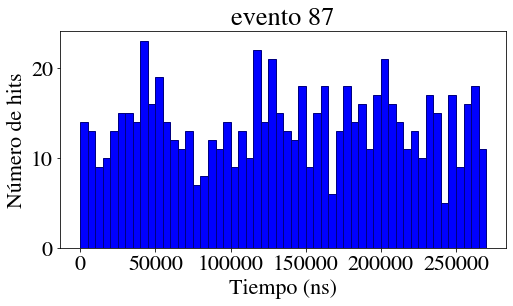

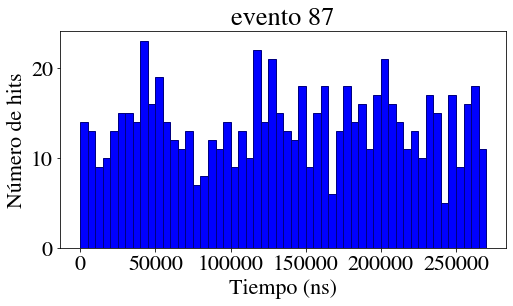

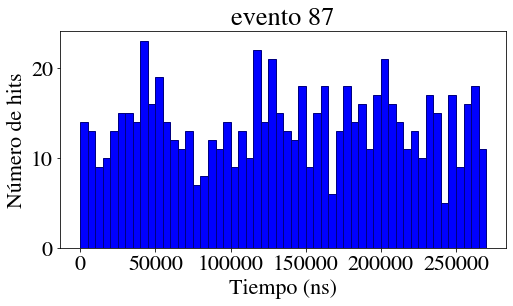

In [65]:
event_number = 87

plt.figure(figsize=(8, 4))
plt.hist(times_branch_sorted_TOF[event_number], range = [0, 270000], bins = 54,color='blue', edgecolor='navy')
plt.xlabel('Tiempo (ns)')
plt.ylabel('Número de hits')
plt.title(f'evento {event_number}')
plt.show()


plt.figure(figsize=(8, 4))
plt.hist(times_branch_modified[event_number], range = [0, 270000], bins = 54,color='blue', edgecolor='navy')
plt.xlabel('Tiempo (ns)')
plt.ylabel('Número de hits')
plt.title(f'evento {event_number}')
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(times_branch_modified_chargesTT[event_number], range = [0, 270000], bins = 54,color='blue', edgecolor='navy')
plt.xlabel('Tiempo (ns)')
plt.ylabel('Número de hits')
plt.title(f'evento {event_number}')
plt.show()

In [66]:
nDetections_event_in = []
nDetections_event_fin = []

nDetections_event_in_sig = []
nDetections_event_fin_sig = []

for x in times_branch_sorted_TOF:
    nDetections_event_in.append(len(x))

for x in times_branch_modified_chargesTT:
    nDetections_event_fin.append(len(x))

for x in times_branch_sorted_TOF_sig:
    nDetections_event_in_sig.append(len(x))

for x in times_branch_modified_chargesTT_sig:
    nDetections_event_fin_sig.append(len(x))

In [67]:
n_bins = 50

N_events = tree.num_entries
N_events_sig = tree_sig.num_entries

hist_in, bin_edges = np.histogram(nDetections_event_in, bins=n_bins)
hist_in_sig, _ = np.histogram(nDetections_event_in_sig, bins=bin_edges)  # usa los mismos bordes

hist_filtered, _ = np.histogram(nDetections_event_fin, bins = bin_edges)
hist_filtered_sig, _ = np.histogram(nDetections_event_fin_sig, bins = bin_edges)

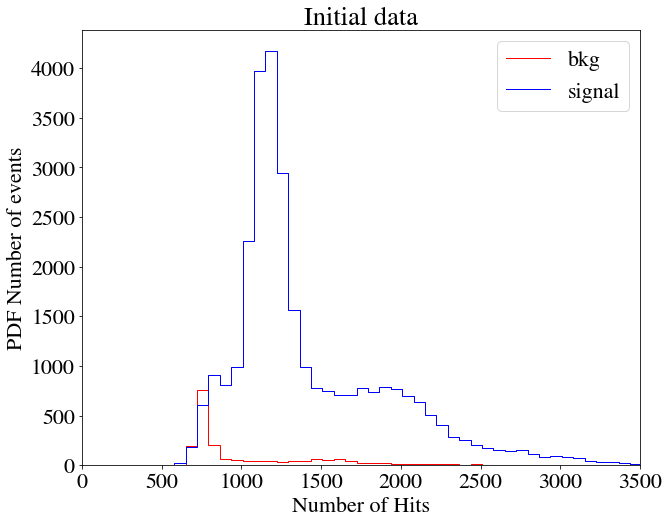

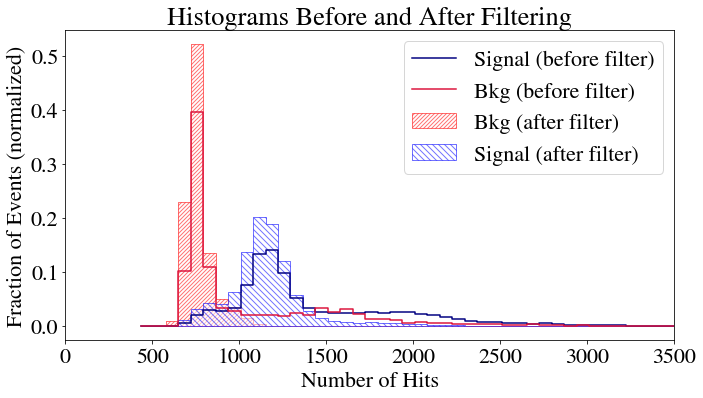

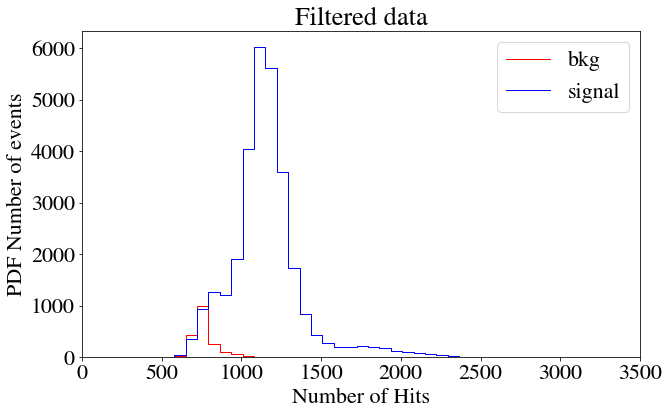

In [68]:
plt.figure(facecolor='white')
plt.step(bin_edges[:-1], hist_in, where='post', linewidth=1, label='bkg', color='red')
plt.step(bin_edges[:-1], hist_in_sig, where='post', linewidth=1, label='signal', color='blue')
plt.ylim(bottom=0)
plt.legend()
plt.xlabel('Number of Hits')
plt.ylabel('PDF Number of events')
plt.title('Initial data')
plt.xlim(0, 3500)
plt.show()

plt.figure(figsize=(10, 6), facecolor='white')
plt.fill_between(bin_edges[:-1], hist_filtered / N_events, hatch='//////', step='post', color='white', edgecolor='red', alpha=0.55, label='Bkg (after filter)')
plt.fill_between(bin_edges[:-1], hist_filtered_sig / N_events_sig, hatch='\\\\\\\\', step='post', color='white', edgecolor='blue', alpha=0.55, label='Signal (after filter)')
plt.step(bin_edges[:-1], hist_in_sig / N_events_sig, where='post', color='navy', linestyle='-', linewidth=1.5, label='Signal (before filter)')
plt.step(bin_edges[:-1], hist_in / N_events, where='post', color='crimson', linestyle='-', linewidth=1.5, label='Bkg (before filter)')
plt.legend()
plt.xlabel('Number of Hits')
plt.ylabel('Fraction of Events (normalized)')
plt.title('Histograms Before and After Filtering')
plt.tight_layout()
plt.xlim(0, 3500)
plt.show()

plt.figure(figsize=(10, 6), facecolor='white')
plt.step(bin_edges[:-1], hist_filtered, linewidth = 1, where='post', label='bkg', color='red')
plt.step(bin_edges[:-1], hist_filtered_sig, linewidth = 1, where='post', label='signal', color='blue')
plt.ylim(bottom=0)
plt.legend()
plt.xlabel('Number of Hits')
plt.ylabel('PDF Number of events')
plt.title('Filtered data')
plt.xlim(0, 3500)
plt.show()

In [69]:
bin_window = 4000

nHits_tot = functions_spills.counting_nHits_window(event_number_branch, times_branch_modified_chargesTT, bin_window)
nHits_in = functions_spills.counting_nHits_window(event_number_branch, times_branch_sorted_TOF, bin_window)

nHits_tot_sig = functions_spills.counting_nHits_window(event_number_branch_sig, times_branch_modified_chargesTT_sig, bin_window)
nHits_in_sig = functions_spills.counting_nHits_window(event_number_branch_sig, times_branch_sorted_TOF_sig, bin_window)

In [70]:
hist_in, bin_edges = np.histogram(nHits_in, bins=100, range=(0, 500))
hist_in_sig, _ = np.histogram(nHits_in_sig, bins=bin_edges)  # usa los mismos bordes

hist_filtered, _ = np.histogram(nHits_tot, bins = bin_edges)
hist_filtered_sig, _ = np.histogram(nHits_tot_sig, bins = bin_edges)

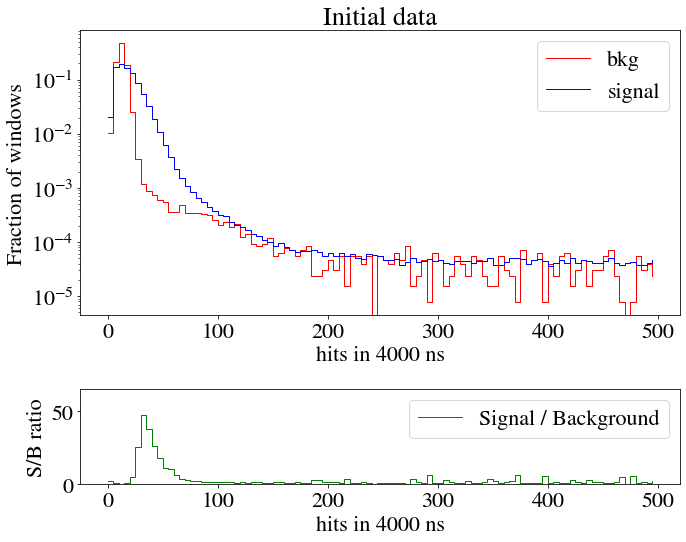

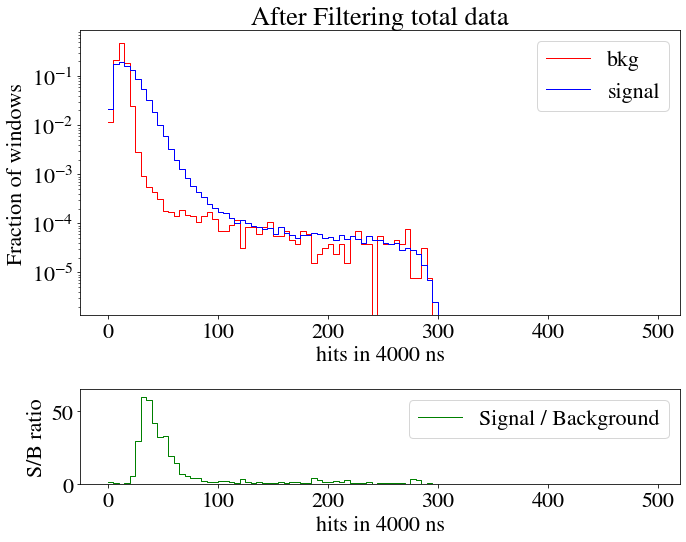

In [71]:
n_windows_ev = 270000 / bin_window

fig, axs = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})

# Top plot: Background and Signal
axs[0].step(bin_edges[:-1], hist_in / (N_events * n_windows_ev), linewidth = 1, where='post', label='bkg', color='red')
axs[0].step(bin_edges[:-1], hist_in_sig / (N_events_sig * n_windows_ev), linewidth = 1, where='post', label='signal', color='blue')

axs[0].set_ylabel("Fraction of windows")
axs[0].set_xlabel(f"hits in {bin_window} ns")
axs[0].set_title("Initial data")
axs[0].set_yscale('log')
axs[0].legend()

# Bottom plot: Signal/Background Ratio
ratio = np.divide(
    hist_in_sig / (N_events_sig * n_windows_ev),
    hist_in / (N_events * n_windows_ev),
    out=np.full_like(hist_in, 0, dtype=float),
    where=hist_in > 0)
axs[1].step(bin_edges[:-1], ratio, linewidth = 1, where='post', color='green', label='Signal / Background')
axs[1].set_xlabel(f"hits in {bin_window} ns")
axs[1].set_ylabel("S/B ratio")
axs[1].legend()
axs[1].set_ylim(0, 65)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})

# Top plot: Background and Signal
axs[0].step(bin_edges[:-1], hist_filtered / (N_events * n_windows_ev), linewidth = 1, where='post', label='bkg', color='red')
axs[0].step(bin_edges[:-1], hist_filtered_sig / (N_events_sig * n_windows_ev), linewidth = 1, where='post', label='signal', color='blue')
axs[0].set_ylabel("Fraction of windows")
axs[0].set_xlabel(f"hits in {bin_window} ns")
axs[0].set_title("After Filtering total data")
axs[0].set_yscale('log')
axs[0].legend()

# Bottom plot: Signal/Background Ratio
ratio_2 = np.divide(
    hist_filtered_sig / (N_events_sig * n_windows_ev),
    hist_filtered / (N_events * n_windows_ev),
    out=np.full_like(hist_filtered, 0, dtype=float),
    where=hist_filtered > 0)
axs[1].step(bin_edges[:-1], ratio_2, linewidth = 1, where='post', color='green', label='Signal / Background')
axs[1].set_xlabel(f"hits in {bin_window} ns")
axs[1].set_ylabel("S/B ratio")
axs[1].legend()
axs[1].set_ylim(0, 65)
plt.tight_layout()
plt.show()


In [72]:
threshold_times_prompt = functions_spills.prompt_candidates(event_number_branch, times_branch_modified_chargesTT, 500, 200, 100, 300)
threshold_times_prompt_sig = functions_spills.prompt_candidates(event_number_branch_sig, times_branch_modified_chargesTT_sig, 500, 200, 100, 300)

Searching prompt candidates on event 0...
Searching prompt candidates on event 1000...
Searching prompt candidates on event 0...
Searching prompt candidates on event 1000...
Searching prompt candidates on event 2000...
Searching prompt candidates on event 3000...
Searching prompt candidates on event 4000...
Searching prompt candidates on event 5000...
Searching prompt candidates on event 6000...
Searching prompt candidates on event 7000...
Searching prompt candidates on event 8000...
Searching prompt candidates on event 9000...
Searching prompt candidates on event 10000...
Searching prompt candidates on event 11000...
Searching prompt candidates on event 12000...
Searching prompt candidates on event 13000...
Searching prompt candidates on event 14000...
Searching prompt candidates on event 15000...
Searching prompt candidates on event 16000...
Searching prompt candidates on event 17000...
Searching prompt candidates on event 18000...
Searching prompt candidates on event 19000...
Search

In [73]:
print(threshold_times_prompt_sig)

total = sum(len(lista) for lista in threshold_times_prompt.values())
print("Total de elementos en todas las listas:", total)

total = sum(len(lista) for lista in threshold_times_prompt_sig.values())
print("Total de elementos en todas las listas:", total)


{22: [189923.39450217725], 27: [216357.05748424647], 30: [14494.360502520834], 38: [10992.975442632256], 51: [206386.56487140662], 56: [230543.01884400236], 71: [179871.8000534821], 83: [240476.87713165735], 85: [247863.64622163036], 99: [139082.32725746094], 124: [147245.77331603048], 138: [161516.7966024287], 166: [244948.49890035193], 167: [82889.4420747646], 188: [86104.4609115074], 208: [152871.3512529153], 209: [137787.2057934134], 213: [108185.79437303434], 218: [54891.38429841802], 227: [67994.3698284974], 234: [42115.09229697538], 240: [12974.436329168524], 257: [127390.04449009719], 266: [212436.59024722694], 269: [132726.16773681904], 277: [269762.4067732478], 284: [16197.7621583193], 306: [105454.88349893875], 330: [15258.362769209882], 333: [193662.3419144784, 259180.18207954633], 340: [244476.95609455428], 344: [198662.41484556903], 353: [220128.72842742605], 360: [120201.14207737235], 367: [239410.1791304845], 373: [238419.3317133955], 376: [261784.7034376637], 377: [216

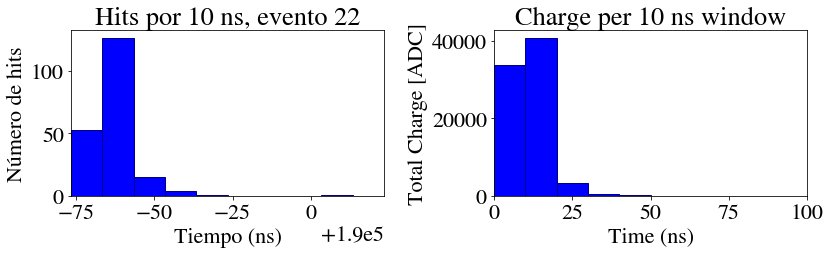

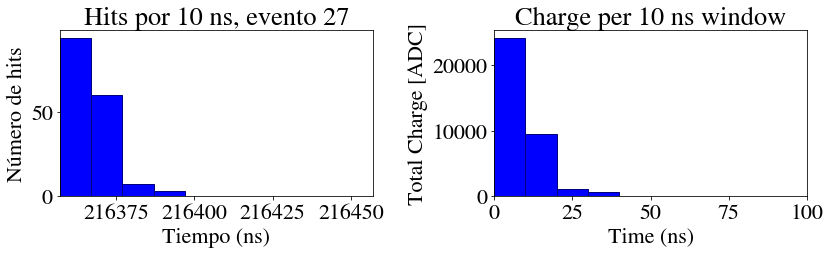

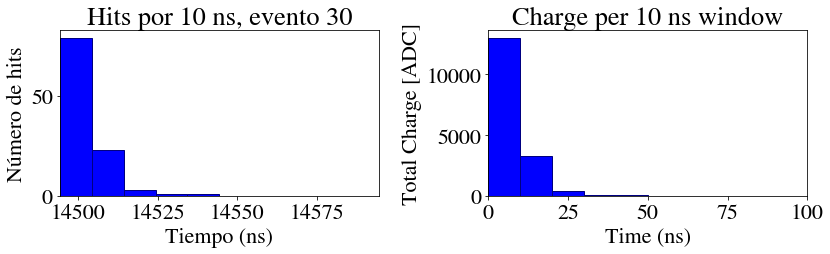

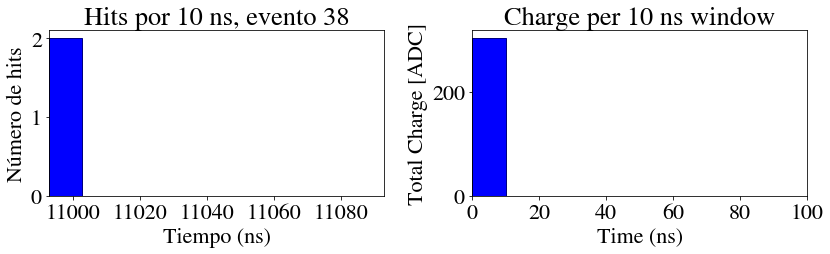

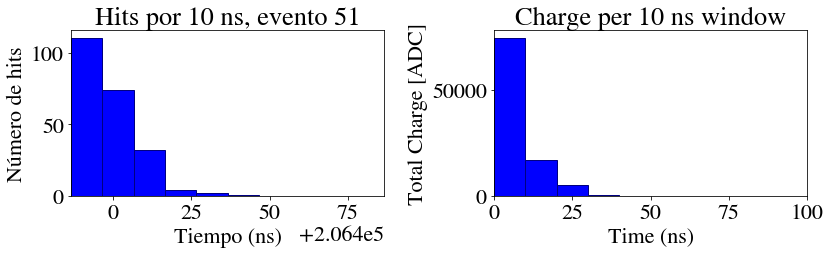

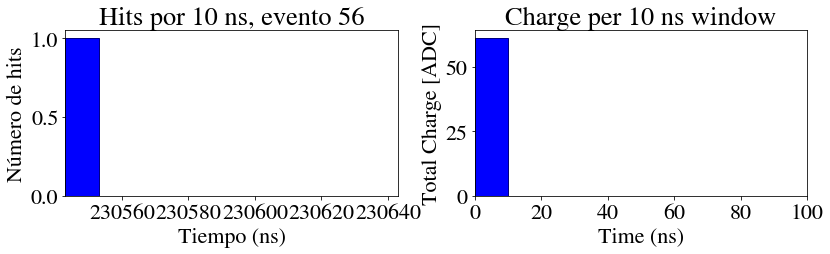

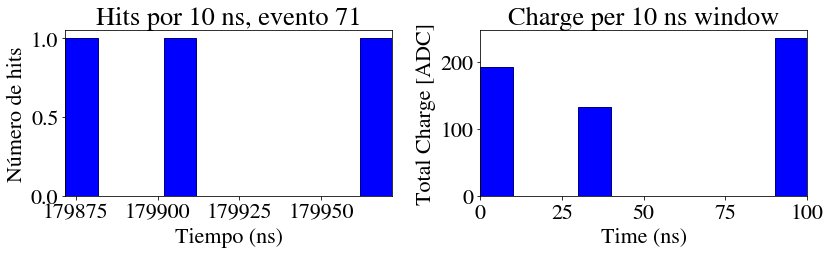

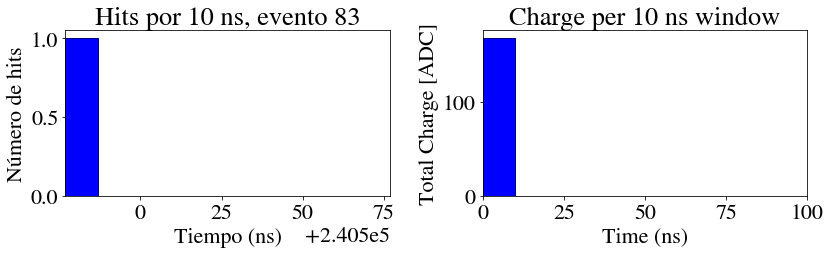

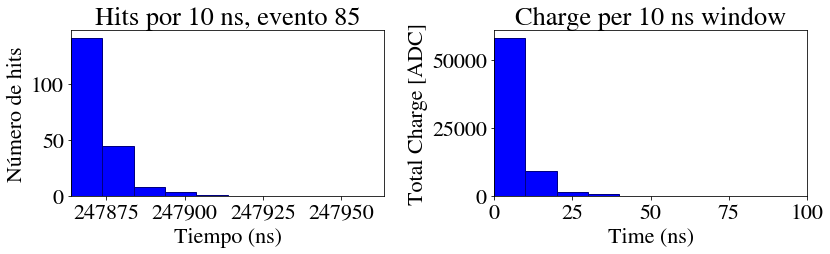

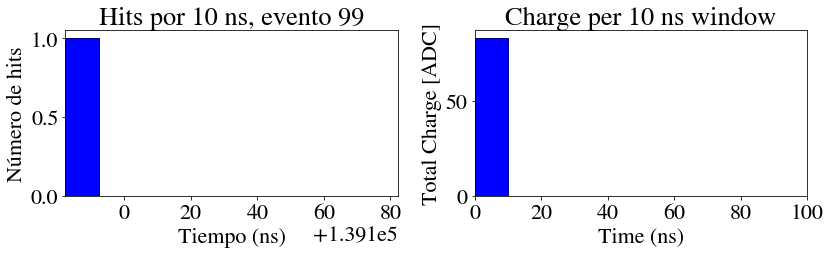

'\n        plt.figure(figsize=(8, 4))\n        plt.hist(charge, bins=100, color=\'blue\', edgecolor=\'navy\')\n        plt.xlabel(\'Charge (u.a)\')\n        plt.ylabel(\'Número de hits\')\n        plt.title("Histograma Charge in 50ns window")\n        plt.show()'

In [74]:
trigger_times_half = dict(list(threshold_times_prompt_sig.items())[0:10])
bin_time = 10
delta = 100

for event_number in trigger_times_half:
    for start_time in trigger_times_half[event_number]:
        times_branch_event = times_branch_sorted_TOF_sig[event_number]
        charges_branch_event = charge_branch_sorted_sig[event_number]

        mask = (times_branch_event >= start_time) & (times_branch_event < start_time + delta)

        time = times_branch_event[mask]
        charge = charges_branch_event[mask]

        fig, axs = plt.subplots(1, 2, figsize=(12, 4))

        # --- Subplot 2: Histograma de número de hits en ventanas de 10 ns ---
        axs[0].hist(time, range=(start_time, start_time + delta), bins=int(delta/bin_time), color='blue', edgecolor='navy')
        axs[0].set_xlabel('Tiempo (ns)')
        axs[0].set_ylabel('Número de hits')
        axs[0].set_title(f"Hits por {bin_time} ns, evento {event_number}")
        axs[0].set_xlim(start_time, start_time+delta)
        #axs[0].set_yscale('log')

        sum_charges = functions_spills.plot_TotalCharge_Time(time, charge, bin_time, delta)

        axs[1].bar(np.arange(0, 0+delta, bin_time), sum_charges, width = bin_time, color='blue',  align='edge', edgecolor='navy')
        axs[1].set_xlabel("Time (ns)")
        axs[1].set_ylabel("Total Charge [ADC]")
        axs[1].set_title(f"Charge per {bin_time} ns window")
        axs[1].set_xlim(0, delta)
        #axs[1].set_yscale('log')
        plt.tight_layout()
        plt.show()
"""
        plt.figure(figsize=(8, 4))
        plt.hist(charge, bins=100, color='blue', edgecolor='navy')
        plt.xlabel('Charge (u.a)')
        plt.ylabel('Número de hits')
        plt.title("Histograma Charge in 50ns window")
        plt.show()"""

In [75]:
window_ns = 500

times_branch_sup5 = []
for event in event_number_branch:

    if event in threshold_times_prompt.keys():
    
        all_hits = [t for ref_time in threshold_times_prompt[event]
            for t in times_branch_modified_chargesTT[event]
            if ref_time <= t <= ref_time + window_ns]
    else:
        all_hits = []
    
    times_branch_sup5.append(np.array(all_hits))

times_branch_sup5_sig = []
for event in event_number_branch_sig:
    if event in  threshold_times_prompt_sig.keys():

        all_hits = [t for ref_time in threshold_times_prompt_sig[event]
            for t in times_branch_modified_chargesTT_sig[event]
            if ref_time <= t <= ref_time + window_ns]
    else:
        all_hits= []
    times_branch_sup5_sig.append(np.array(all_hits))

In [76]:
def lista_complementaria_eventos(lista1, lista2):
    """
    Devuelve una lista de arrays, cada uno es el complementario de lista2 respecto a lista1 para cada evento.
    """
    return [np.array([x for x in arr1 if x not in arr2])
            for arr1, arr2 in zip(lista1, lista2)]

times_branch_inf5 = lista_complementaria_eventos(times_branch_modified_chargesTT, times_branch_sup5)
times_branch_inf5_sig = lista_complementaria_eventos(times_branch_modified_chargesTT_sig, times_branch_sup5_sig)


In [77]:
print(times_branch_modified_chargesTT_sig[0])

[ 48299.40215773  49176.73300288  50324.80263144  50477.96405069
  50762.02340537  51026.8555935   51186.18408433  51539.33404445
  51594.96872448  53903.90326322  54378.78962321  54957.66918497
  55070.96272348  55220.37029583  55235.73207122  55235.94658296
  55236.59637845  55237.48436987  55237.83319154  55237.95362354
  55239.64651262  55240.08452285  55240.66921362  55243.6822136
  56120.44318122  57389.09871257  57761.92110495  57846.64556027
  58245.44722549  58986.33195894  59022.87405512  59070.99532625
  59194.1942544   59310.44398107  59617.34913077  59791.88881009
  59848.55012237  60433.53761723  60969.4555876   62420.82517164
  62791.0379424   62877.85840117  64935.26548749  64935.49780494
  64950.14296229  64966.33940821  64979.14132399  65029.26931746
  65079.73120078  65209.06018418  65295.99294023  65318.06581735
  65479.35127459  65505.17570908  65693.50025265  65811.17860144
  66008.80918072  66597.68458672  66865.08376946  67032.43181823
  67072.58912572  67685.51

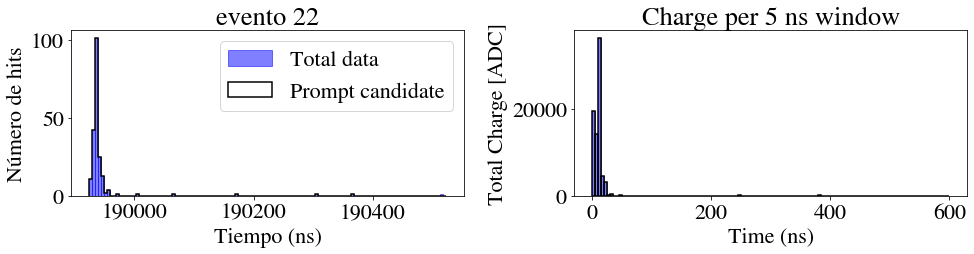

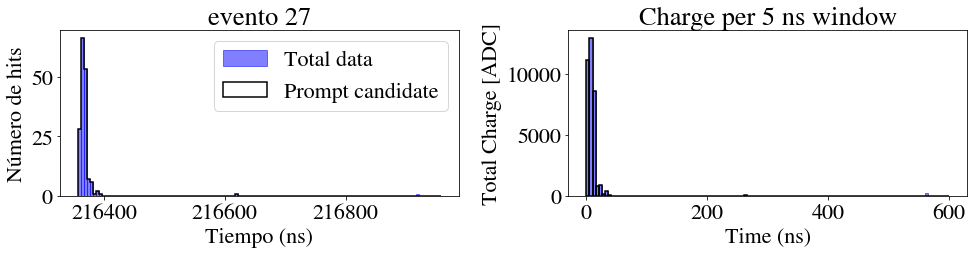

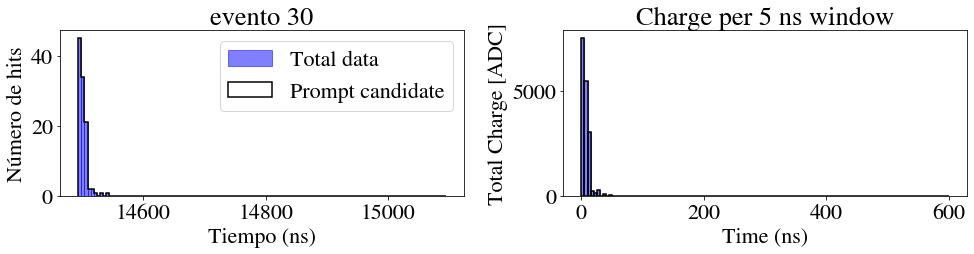

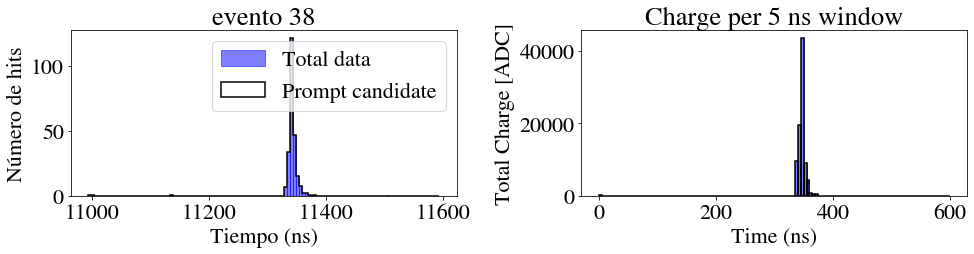

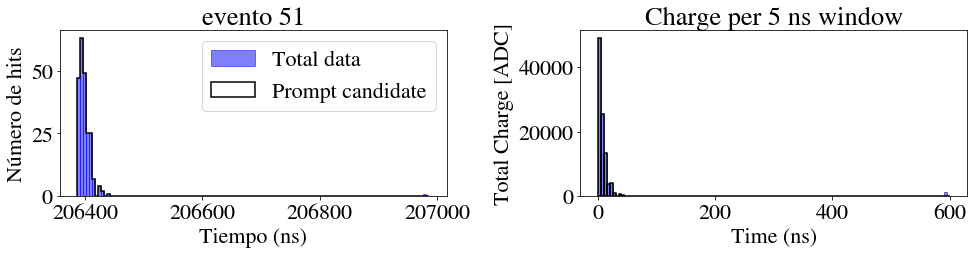

In [78]:
threshold_times_50_cutted = dict(list(threshold_times_prompt_sig.items())[0:5])

for event_number in threshold_times_50_cutted:
    for start_time in threshold_times_50_cutted[event_number]:

        indices_en_rango = np.where((times_branch_modified_chargesTT_sig[event_number] >= start_time) & (times_branch_modified_chargesTT_sig[event_number] < start_time + 600))[0]
        charge = charge_branch_modified_chargesTT_sig[event_number][indices_en_rango]
        time = times_branch_modified_chargesTT_sig[event_number][indices_en_rango]

        bin_time =  5
        sum_charges = functions_spills.plot_TotalCharge_Time(time, charge, bin_time, 600)

        set_sup5 = set(times_branch_sup5_sig[event_number])

        # Encontramos los índices en la primera lista cuyos elementos están en la segunda
        matching_indices = [i for i, val in enumerate(times_branch_modified_chargesTT_sig[event_number]) if val in set_sup5]

        charges_sup5 = charge_branch_modified_chargesTT_sig[event_number][matching_indices]

        indices_en_rango = np.where((times_branch_sup5_sig[event_number] >= start_time) & (times_branch_sup5_sig[event_number] < start_time + 600))[0]
        charge = charges_sup5[indices_en_rango]
        time = times_branch_sup5_sig[event_number][indices_en_rango]

        sum_charges_sup5 = functions_spills.plot_TotalCharge_Time(time, charge, bin_time, 600)
    

        fig, axs = plt.subplots(1, 2, figsize=(14, 4))

        # Left: Histogram of hits
        axs[0].hist(
            times_branch_modified_chargesTT_sig[event_number],
            range=[start_time, start_time + 600],
            bins=120,
            color='blue',
            edgecolor='blue',
            alpha=0.5,
            label="Total data"
        )
        axs[0].hist(
            times_branch_sup5_sig[event_number],
            range=[start_time, start_time + 600],
            bins=120,
            histtype='step',
            color='black',
            linewidth=1.5,
            label="Prompt candidate"
        )
        axs[0].set_xlabel('Tiempo (ns)')
        axs[0].set_ylabel('Número de hits')
        axs[0].set_title(f'evento {event_number}')
        axs[0].legend()

        # Right: Bar plot of charges
        axs[1].bar(
            np.arange(0, 0 + 600, bin_time),
            sum_charges,
            width=bin_time,
            color='blue',
            align='edge',
            edgecolor='navy',
            alpha=0.5, 
            label="Total data"
        )
        axs[1].bar(
            np.arange(0, 0 + 600, bin_time),
            sum_charges_sup5,
            width=bin_time,
            facecolor='none',
            align='edge',
            edgecolor='black', 
            linewidth=1.5,
            label="Prompt candidate"
        )
        axs[1].set_xlabel("Time (ns)")
        axs[1].set_ylabel("Total Charge [ADC]")
        axs[1].set_title(f"Charge per {bin_time} ns window")

        plt.tight_layout()
        plt.show()


In [79]:
neutron_dict = functions_spills.neutron_detection(event_number_branch, times_branch_modified_chargesTT,  threshold_times_prompt, 150000, 100, 22, 30, window_prompt=500)
neutron_dict_sig = functions_spills.neutron_detection(event_number_branch_sig, times_branch_modified_chargesTT_sig,  threshold_times_prompt_sig, 150000, 100, 22, 30, window_prompt=500)

Searching neutron coincidences on event 0...
Searching neutron coincidences on event 1000...
Searching neutron coincidences on event 0...
Searching neutron coincidences on event 1000...
Searching neutron coincidences on event 2000...
Searching neutron coincidences on event 3000...
Searching neutron coincidences on event 4000...
Searching neutron coincidences on event 5000...
Searching neutron coincidences on event 6000...
Searching neutron coincidences on event 7000...
Searching neutron coincidences on event 8000...
Searching neutron coincidences on event 9000...
Searching neutron coincidences on event 10000...
Searching neutron coincidences on event 11000...
Searching neutron coincidences on event 12000...
Searching neutron coincidences on event 13000...
Searching neutron coincidences on event 14000...
Searching neutron coincidences on event 15000...
Searching neutron coincidences on event 16000...
Searching neutron coincidences on event 17000...
Searching neutron coincidences on even

{53: {157505.8508492136: [168555.54470372826]}, 237: {192842.8716595238: [194357.23072314222]}, 349: {29530.45408678801: [33186.90207617746, 46008.83619683493]}, 383: {84965.45064635832: [117527.11425650422]}, 452: {124733.6508134622: [247667.63345364612]}, 643: {169940.36309798324: [224659.72128620712]}, 766: {46192.8163983193: [47906.298461523824, 58005.09275935896]}, 779: {130774.81981747794: [196786.69003569472]}, 817: {54589.75193936091: [60143.88849481875]}, 914: {68203.81561010555: [73889.2120653981]}, 922: {147974.32990521615: [148475.21370263674, 229788.66726061612]}, 947: {3236.0706649611025: [5376.526851239463]}, 983: {252944.6679864145: [266081.7354329689]}, 995: {112125.39439758571: [114130.03120492683, 243470.26658472692]}, 1004: {30707.99499263125: [110255.14606676696]}, 1025: {231813.19976911554: [234742.71922376985]}, 1030: {11205.830244524695: [11959.533894506525]}, 1083: {210142.3146852956: [210647.24080725558]}, 1136: {81731.25251598403: [202656.61312970967]}, 1211:

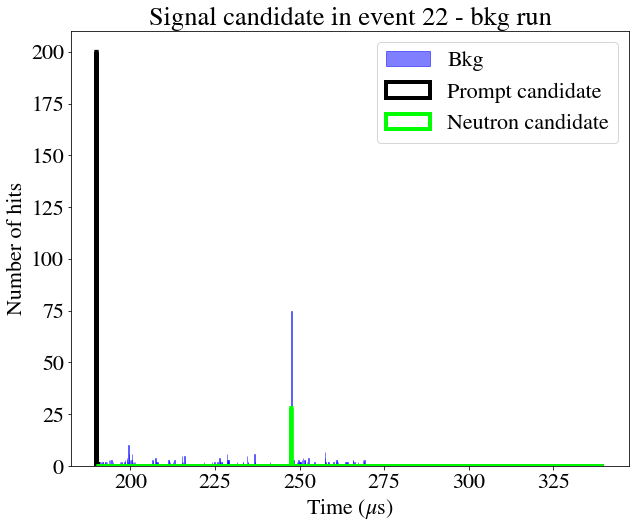

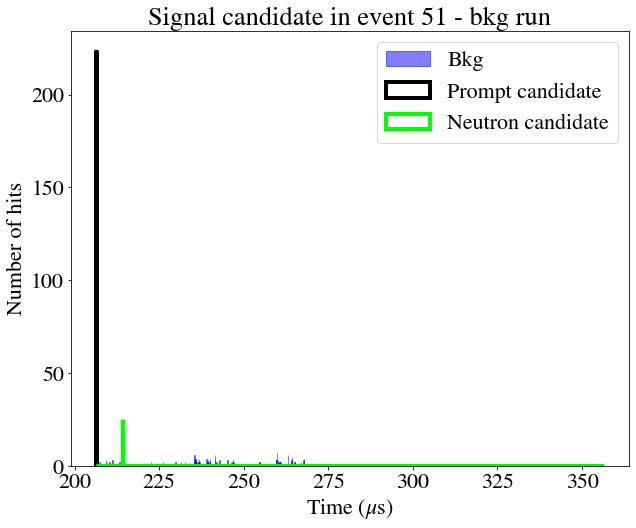

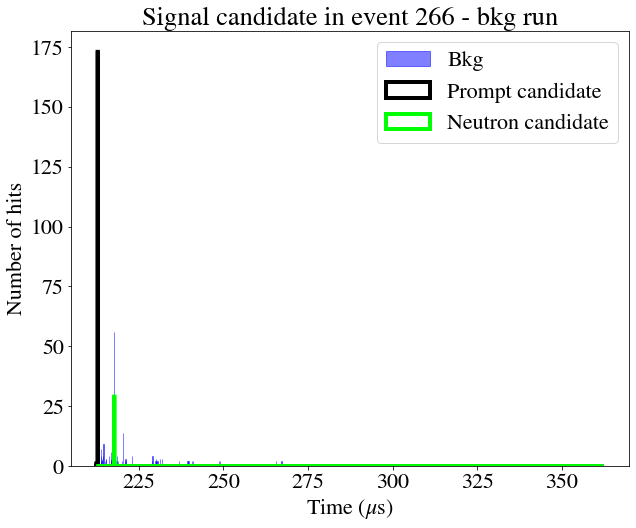

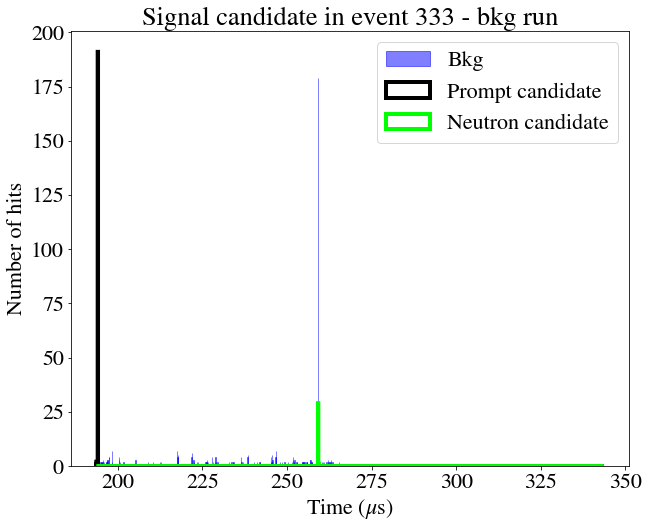

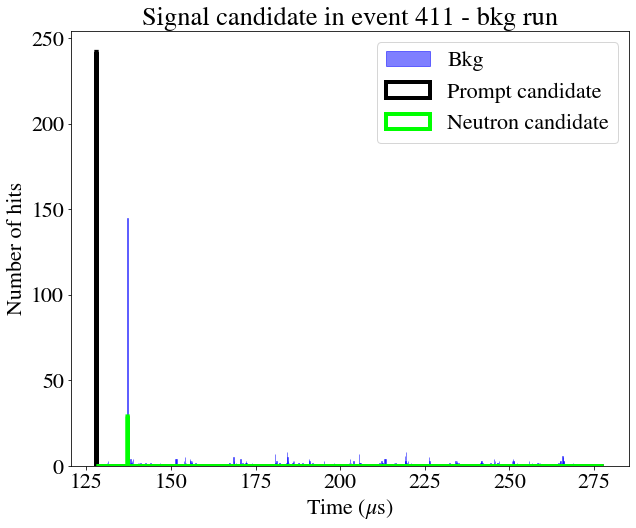

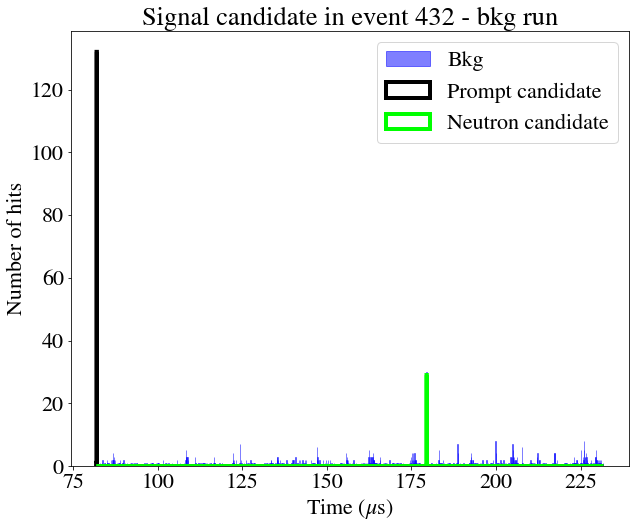

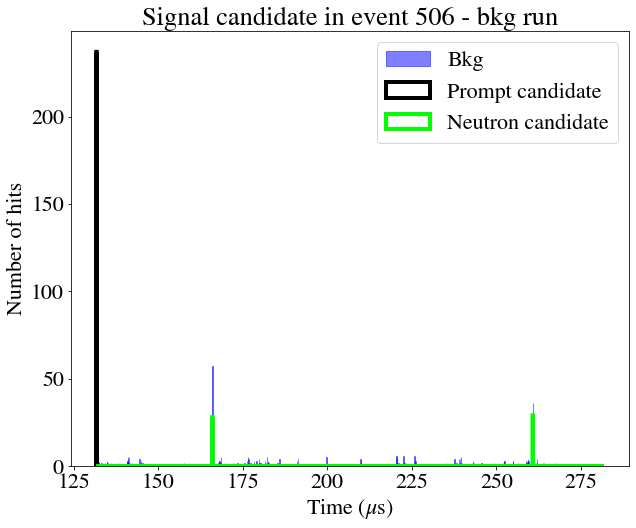

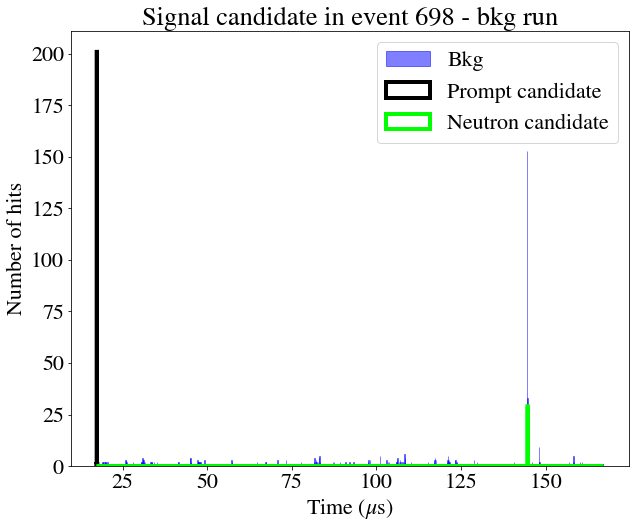

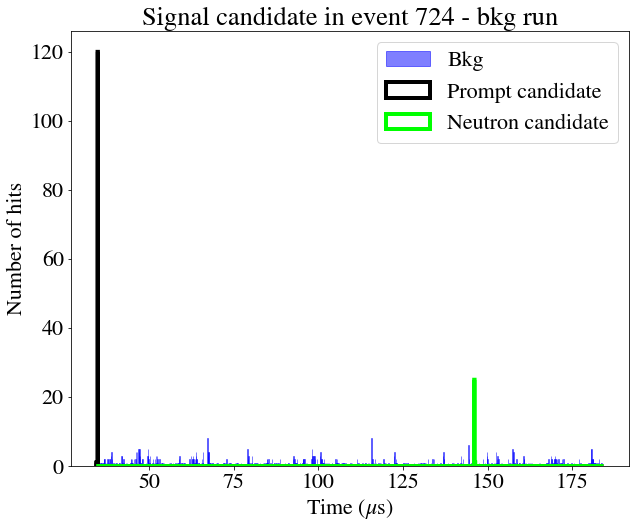

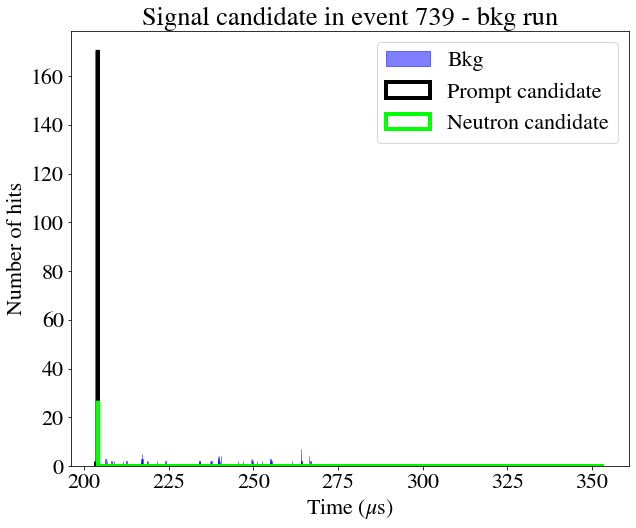

In [80]:
neutron_dict_cut = dict(list(neutron_dict_sig.items())[0:10])

print(neutron_dict)

for event_number in neutron_dict_cut:
    for start_time in neutron_dict_cut[event_number]:

        neutron_times = neutron_dict_cut[event_number][start_time]
        times_tot = times_branch_modified_chargesTT_sig[event_number]
        times_prompt = times_branch_sup5_sig[event_number]
        bin_edges = np.arange(start_time, start_time + 150000, 100)

        plt.figure()
        plt.hist(
            times_tot,
            bins=bin_edges,
            color='blue',
            edgecolor='blue',
            alpha=0.5,
            label="Bkg"
        )
        mask = (times_prompt>= start_time) & (times_prompt < start_time + 600)
        plt.hist(
            times_prompt[mask],
            bins=bin_edges,
            histtype='step',
            color='black',
            linewidth=4,
            label="Prompt candidate"
        )
        for t in neutron_times:
            mask = (times_tot >= t) & (times_tot <= t + 200)
            plt.hist(
                times_tot[mask],
                bins=bin_edges,
                histtype='step',
                color='lime',
                linewidth=4,
                label='Neutron candidate' if t == neutron_times[0] else None
            )
        plt.xlabel(r'Time ($\mu$s)')
        plt.ylabel('Number of hits')
        plt.title(f'Signal candidate in event {event_number} - bkg run')
        plt.xticks() 
        plt.yticks()
        plt.legend()
        plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}'))
        plt.show()

In [81]:
print(sum(len(v) for v in neutron_dict.values()))
print(sum(len(v) for v in threshold_times_prompt.values()))

print(sum(len(v) for v in neutron_dict_sig.values()))
print(sum(len(v) for v in threshold_times_prompt_sig.values()))

27
225
846
3685


In [82]:
print(neutron_dict)
deltaT = []
for event_number in neutron_dict:
    for start_time in neutron_dict[event_number]:
        neutron_times = neutron_dict[event_number][start_time]
        deltaT.append(min(neutron_times) - start_time)

print(deltaT)
print(np.mean(deltaT))


print(neutron_dict_sig)
deltaT_sig = []
for event_number in neutron_dict_sig:
    for start_time in neutron_dict_sig[event_number]:
        neutron_times = neutron_dict_sig[event_number][start_time]
        deltaT_sig.append(min(neutron_times) - start_time)

print(deltaT_sig)
print(np.mean(deltaT_sig))


{53: {157505.8508492136: [168555.54470372826]}, 237: {192842.8716595238: [194357.23072314222]}, 349: {29530.45408678801: [33186.90207617746, 46008.83619683493]}, 383: {84965.45064635832: [117527.11425650422]}, 452: {124733.6508134622: [247667.63345364612]}, 643: {169940.36309798324: [224659.72128620712]}, 766: {46192.8163983193: [47906.298461523824, 58005.09275935896]}, 779: {130774.81981747794: [196786.69003569472]}, 817: {54589.75193936091: [60143.88849481875]}, 914: {68203.81561010555: [73889.2120653981]}, 922: {147974.32990521615: [148475.21370263674, 229788.66726061612]}, 947: {3236.0706649611025: [5376.526851239463]}, 983: {252944.6679864145: [266081.7354329689]}, 995: {112125.39439758571: [114130.03120492683, 243470.26658472692]}, 1004: {30707.99499263125: [110255.14606676696]}, 1025: {231813.19976911554: [234742.71922376985]}, 1030: {11205.830244524695: [11959.533894506525]}, 1083: {210142.3146852956: [210647.24080725558]}, 1136: {81731.25251598403: [202656.61312970967]}, 1211:

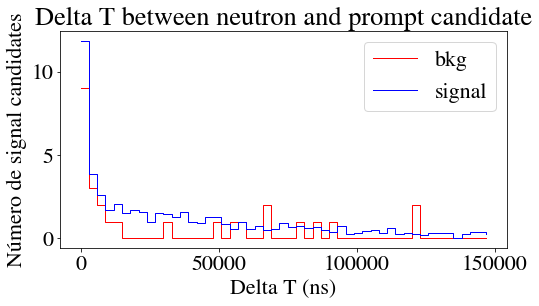

In [83]:
hist, bins_edges = np.histogram(deltaT, bins=50, range=(0, 150000))
hist_sig, _ = np.histogram(deltaT_sig, bins=bins_edges)

plt.figure(figsize=(8, 4))

plt.step(bins_edges[:-1], hist, where='post', linewidth=1, label='bkg', color='red')
plt.step(bins_edges[:-1], hist_sig*N_events/N_events_sig, where='post', linewidth=1, label='signal', color='blue')
plt.xlabel('Delta T (ns)')
plt.ylabel('Número de signal candidates')
plt.title('Delta T between neutron and prompt candidate')
plt.legend()
plt.show()

In [84]:
nDetections_event_inf5 = []
nDetections_event_sup5 = []


for x in times_branch_modified_50:
    nDetections_event_inf5.append(len(x))

for x in times_branch_sup5:
    nDetections_event_sup5.append(len(x))

nDetections_event_inf5_sig = []
nDetections_event_sup5_sig = []


for x in times_branch_modified_50_sig:
    nDetections_event_inf5_sig.append(len(x))

for x in times_branch_sup5_sig:
    nDetections_event_sup5_sig.append(len(x))

NameError: name 'times_branch_modified_50' is not defined

In [ ]:
max_hist = 6500
bin_hist =  100#max_hist / n_bins  
n_bins = int(max_hist / bin_hist)


hist_inf_5, _ = np.histogram(nDetections_event_inf5, bins = bin_edges)
hist_inf_5_sig, _ = np.histogram(nDetections_event_inf5_sig, bins = bin_edges)

hist_sup_5, bin_edges_2 = np.histogram(nDetections_event_sup5, bins = n_bins)
hist_sup_5_sig, _ = np.histogram(nDetections_event_sup5_sig, bins = bin_edges_2)


plt.figure(figsize=(10, 6), facecolor='white')
plt.step(bin_edges[:-1], hist_inf_5 / N_events, where='post', label='bkg', color='red')
plt.step(bin_edges[:-1], hist_inf_5_sig / N_events_sig, where='post', label='signal', color='blue')
plt.legend()
plt.xlabel('Number of Hits')
plt.ylabel('Number of Events')
plt.title('window 50 ns nhits <50')
plt.show()

plt.figure(figsize=(10, 6), facecolor='white')
plt.step(bin_edges_2[:-1], hist_sup_5 / N_events, where='post', label='bkg', color='red')
plt.step(bin_edges_2[:-1], hist_sup_5_sig / N_events_sig, where='post', label='signal', color='blue')
plt.legend()
plt.xlabel('Number of Hits')
plt.ylabel('Number of Events')
plt.title('window 50 ns nhits >50')
#plt.yscale("log")
plt.show()


In [ ]:
bin_window = 4000

nHits_inf5 = functions_spills.counting_nHits_window(event_number_branch, times_branch_modified_50, bin_window)
nHits_sup5 = functions_spills.counting_nHits_window(event_number_branch, times_branch_sup5, bin_window)

nHits_inf5_sig = functions_spills.counting_nHits_window(event_number_branch_sig, times_branch_modified_50_sig, bin_window)
nHits_sup5_sig = functions_spills.counting_nHits_window(event_number_branch_sig, times_branch_sup5_sig, bin_window)


In [ ]:
n_bins = 100

hist_inf_5, bin_inf5 = np.histogram(nHits_inf5, np.arange(0, 11, 1))
hist_inf_5_sig, _ = np.histogram(nHits_inf5_sig, bins = bin_inf5)

hist_sup_5, bin_edges_2 = np.histogram(nHits_sup5, np.arange(0, 50, 2))
hist_sup_5_sig, _ = np.histogram(nHits_sup5_sig, bins = bin_edges_2)


In [ ]:

plt.figure(figsize=(10, 6))
plt.step(bin_inf5[:-1], hist_inf_5 / N_events, where='post', label='bkg', color='red')
plt.step(bin_inf5[:-1], hist_inf_5_sig / N_events_sig, where='post', label='signal', color='blue')
plt.ylabel("Number of windows")
plt.xlabel(f"hits in {bin_window} ns")
plt.title("window 50 ns nhits <5")
#plt.yscale('log')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.step(bin_edges_2[:-1], hist_sup_5 / N_events, where='post', label='bkg', color='red')
plt.step(bin_edges_2[:-1], hist_sup_5_sig / N_events_sig, where='post', label='signal', color='blue')
plt.ylabel("Number of windows")
plt.xlabel(f"hits in {bin_window} ns")
plt.title("window 50 ns nhits >5")
#plt.yscale('log')
plt.legend()
plt.show()